# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Sajad Rahmanian
2.   Student Number: 97101683


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# To load data from google drive uncomment the following lines:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/DeepLearning/HW1/data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

def my_train_test_split(X, y, train_size):
    n_samples = X.shape[0]
    train_samples = int(n_samples * train_size)
    train_indices = np.random.choice(np.arange(n_samples), train_samples, replace=False)
    X_train = X[train_indices, :]
    y_train = y[train_indices]
    test_indices = np.array([i for i in range(n_samples) if i not in train_indices])
    X_test = X[test_indices, :]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

n_samples = dataset.X.values.size
X = np.concatenate((dataset.X.values.reshape((-1, 1)), np.ones((n_samples, 1))), axis=1)
y = dataset.Y.values
x_train, y_train, x_test, y_test = my_train_test_split(X, y, 0.8)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [4]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

m = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train.reshape((-1,1))
print('Intercept is: {}'.format(m[1]))
print('Slope is: {}'.format(m[0]))

Intercept is: [0.82066529]
Slope is: [-1.01319024]


In [5]:
predicted_train_y = m[0] * x_train[:, 0] + m[1]
predicted_test_y = m[0] * x_test[:, 0] + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.34135944093003995
MSE test error: 0.28783555676948996


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

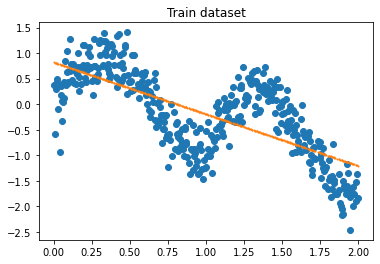

In [6]:
plt.scatter(x_train[:, 0], y_train)
plt.scatter(x_train[:, 0], m[0]*x_train[:, 0] + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

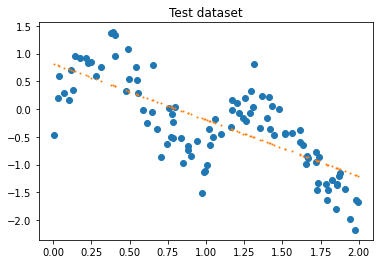

In [7]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], m[0]*x_test[:, 0] + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Whether the results are acceptable or not depends on the definition of acceptable. But it seem that the resulted error are high compared to other methods, so in my opinion no they are not acceptable.

The line doesn't fit the data well, and I think it's not appropriate here.

The problem is that we assumed there was a linear relation between x and y, but the dataset doesn't satisfy this assumption.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, I expect better results because the locally weighted linear regression model is more complex.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [8]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        e = xi - the_query_point
        W[i, i] = np.exp(-e.T @ e / 2 / hyperparameter ** 2)
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [9]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    # X = np.hstack((train_X, np.ones((l, 1))))
    X = train_X
    qx = query_x
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ train_Y.reshape((-1,1)))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [10]:
predicted_test = np.array([predict(x_train, y_train, query, 1/15) for query in x_test])[:, 0, 0]
error = mean_squared_error(y_test, predicted_test)
print(f"MSE test error: {error}")

MSE test error: 0.09114810163667719


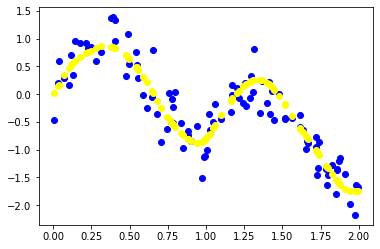

In [11]:
plt.scatter(x_test[:, 0], y_test, c="blue")
plt.scatter(x_test[:, 0], predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, we can see that the error has decreased. The reason is that the data has a piecewise linear form. So, by considering only neighboring points, we can fit a better function.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, because the data seems to be smooth and we can use neighboring values to predict.

### Part10:
Implementing the `KNN model`.

In [12]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = []
        for xi in self.X:
            distances.append(self.distance(x, xi))
        distances = np.array(distances)
        indices = np.argsort(distances)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [13]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [28]:
k = 9
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.10579455489872086


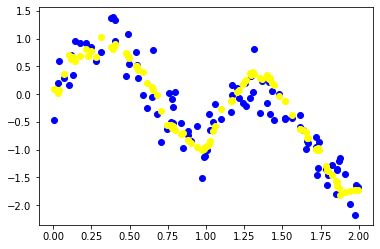

In [26]:
plt.scatter(x_test[:, 0], y_test, c="blue")
plt.scatter(x_test[:, 0], predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, the results show that the fitted model captures the structure of data well. It also shows that to get better results we need more features. Note that for values of k>=5 the change in the results was not noticable